# Import important libraries 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import json
import pymongo
import datetime

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

# set seed for reproducibility
np.random.seed(0)
!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo



# Import the required libraries
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing

  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-16cxffe3\numpy_b21e9b0c892b40e280c159c712cfb507\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?

   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-3w7jy15f\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-3w7jy15f\f2py.exe



    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries openblas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
  get_default_fcompi

ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


# Read data

In [85]:

# read in all our data
traineddata = pd.read_csv("TrainedData.csv")
test = pd.read_csv('BigMart_Test.csv')


# remove all columns with at least one missing value


In [35]:
# remove all columns with at least one missing value
traineddata = traineddata.dropna(axis=0)
traineddata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,1,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


['Low Fat' 'Regular']


<AxesSubplot:>

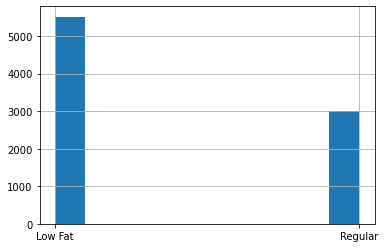

In [29]:
# Replace 'LF' and 'low fat' with 'Low Fat'
traineddata["Item_Fat_Content"].replace(to_replace =["LF", "low fat"], value = "Low Fat", inplace=True)

# Verify the changes
print(traineddata["Item_Fat_Content"].unique())
traineddata["Item_Fat_Content"].hist()


['Low Fat' 'Regular']


<AxesSubplot:>

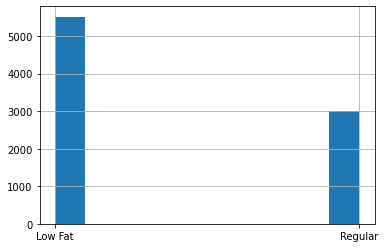

In [30]:
# Create a dictionary to map the inconsistent values to a consistent value
fat_content_map = {"Regular": "Regular", "reg": "Regular"}

# Use the replace() method to replace the values in the "Item_Fat_Content" column
traineddata["Item_Fat_Content"].replace(fat_content_map, inplace=True)

# Now check the unique values of "Item_Fat_Content"
print(traineddata["Item_Fat_Content"].unique())

# Plot a histogram of the values
traineddata["Item_Fat_Content"].hist()


In [31]:
unique_fat_content = traineddata['Item_Fat_Content'].unique()
print(unique_fat_content)


['Low Fat' 'Regular']


In [32]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traineddata['Item_Fat_Content']= label_encoder.fit_transform(traineddata['Item_Fat_Content'])

traineddata['Item_Fat_Content'].unique()


array([0, 1])

# Encode the Outlet_Size column

['Medium' nan 'High' 'Small']


<AxesSubplot:>

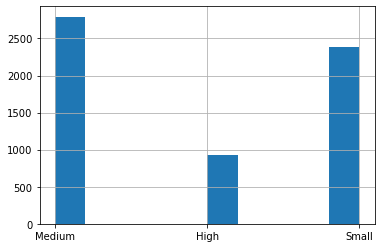

In [34]:
# Now check the unique values of "Item_Fat_Content"
print(traineddata["Outlet_Size"].unique())

# Plot a histogram of the values
traineddata["Outlet_Size"].hist()


['Medium' 'High' 'Small']


<AxesSubplot:>

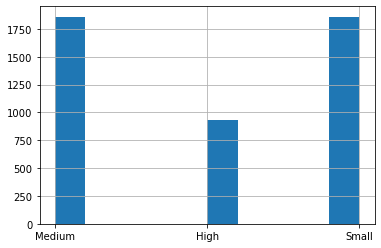

In [36]:
# Now check the unique values of "Item_Fat_Content"
print(traineddata["Outlet_Size"].unique())

# Plot a histogram of the values
traineddata["Outlet_Size"].hist()


In [37]:

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traineddata['Outlet_Size']= label_encoder.fit_transform(traineddata['Outlet_Size'])

traineddata['Outlet_Size'].unique()


array([1, 0, 2])

In [38]:
traineddata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,1,0.083607,Frozen Foods,178.8318,OUT046,1997,2,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,Tier 3,Supermarket Type2,1845.5976


In [44]:

# Encode labels in column 'species'.
traineddata['Outlet_Type']= label_encoder.fit_transform(traineddata['Outlet_Type'])


traineddata['Outlet_Type'].unique()



array([0, 1], dtype=int64)

<AxesSubplot:>

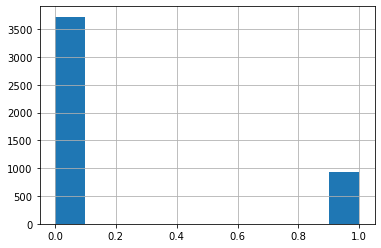

In [45]:

# Plot a histogram of the values
traineddata["Outlet_Type"].hist()

# Encode the tire column
## first visulize the values

['Tier 1' 'Tier 3' 'Tier 2']


<AxesSubplot:>

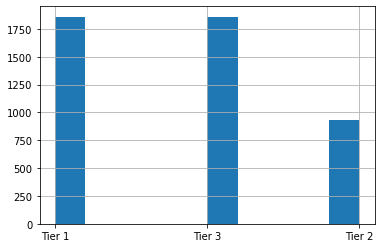

In [46]:
# Now check the unique values of "Item_Fat_Content"
print(traineddata["Outlet_Location_Type"].unique())

# Plot a histogram of the values
traineddata["Outlet_Location_Type"].hist()

# 2. Encode the data 

In [47]:

# Encode labels in column 'species'.
traineddata['Outlet_Location_Type']= label_encoder.fit_transform(traineddata['Outlet_Location_Type'])


traineddata['Outlet_Location_Type'].unique()



array([0, 2, 1])

# 3. Visualize the data after encoding

<AxesSubplot:>

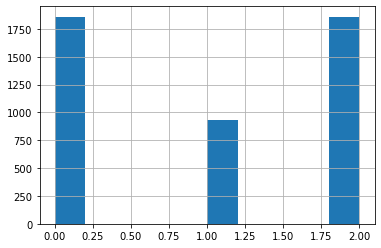

In [48]:

# Plot a histogram of the values
traineddata["Outlet_Location_Type"].hist()

In [49]:
traineddata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,0,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,1,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,0,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,0,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,1,2,1,556.6088


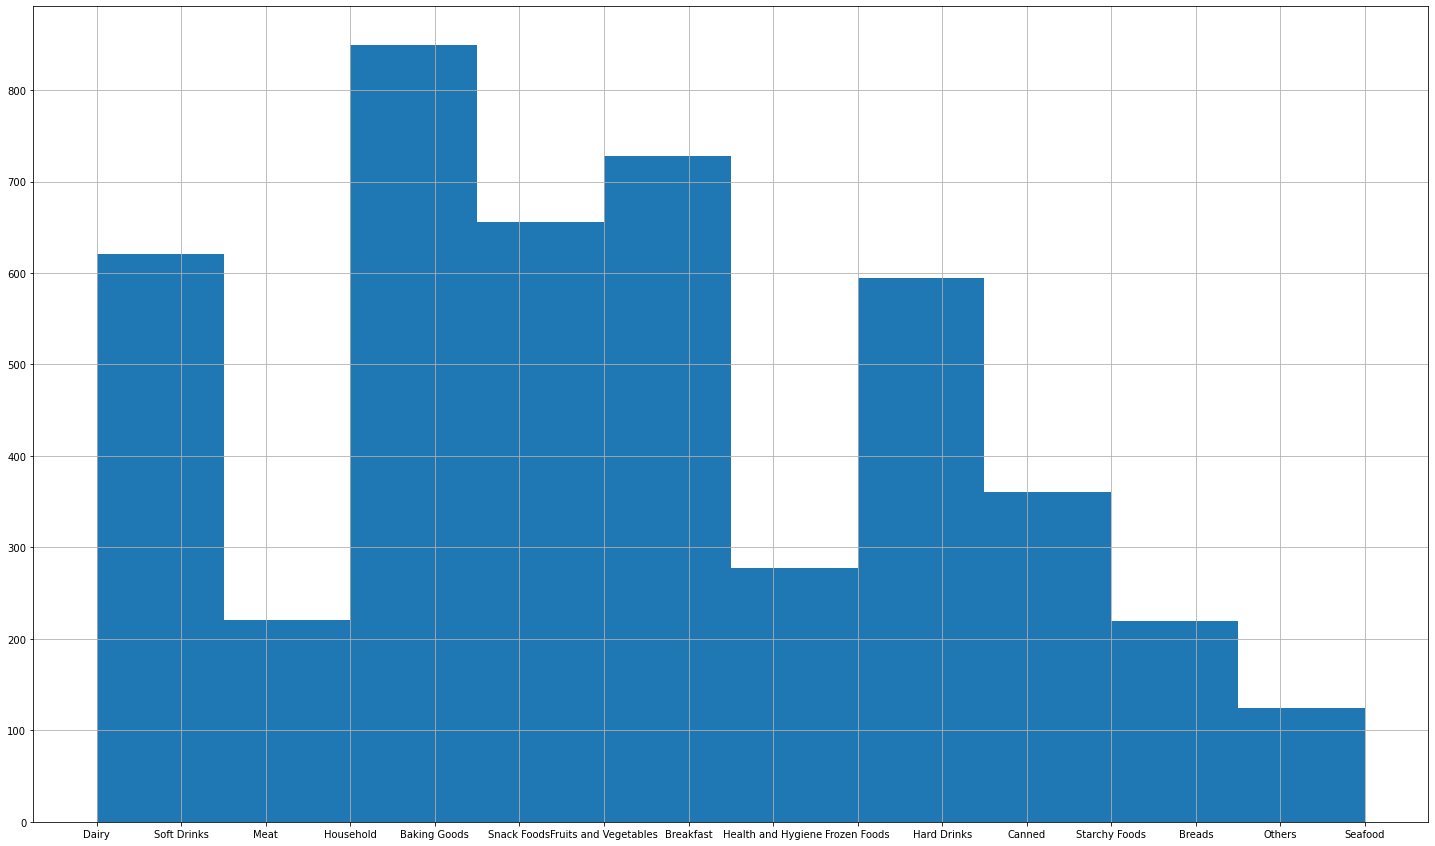

In [53]:

traineddata['Item_Type'].hist(figsize=(25,15))
plt.show()


# Feature engineering 



In [54]:
# Now check the unique values of "Item_Fat_Content"
print(traineddata["Item_Type"].unique())


['Dairy' 'Soft Drinks' 'Meat' 'Household' 'Baking Goods' 'Snack Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Frozen Foods'
 'Hard Drinks' 'Canned' 'Starchy Foods' 'Breads' 'Others' 'Seafood']


## Grouping the values to more general catogiries as food, drinks, and nonconsumable

In [57]:
# Create a dictionary with the mapping of the values
mapping = {'Dairy': 'Food', 'Soft Drinks': 'Drink', 'Meat': 'Food', 'Household': 'Non-consumable',
           'Baking Goods': 'Food', 'Snack Foods': 'Food', 'Fruits and Vegetables': 'Food',
           'Breakfast': 'Food', 'Health and Hygiene':'Food', 'Frozen Foods' : 'Food','Hard Drinks': 'Food', 'Canned': 'Food', 'Starchy Foods': 'Food', 'Breads': 'Food', 'Others': 'Non-consumable', 'Seafood': 'Food'}

# Replace the values in the 'Item_Type' column with the new categories
traineddata['Item_Type'] = traineddata['Item_Type'].replace(mapping)

print(traineddata['Item_Type'].unique())



['Food' 'Drink' 'Non-consumable']


<AxesSubplot:>

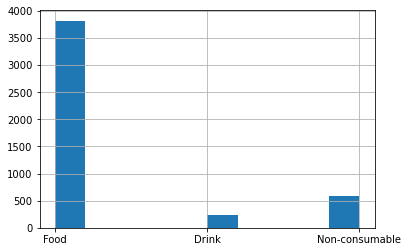

In [58]:
traineddata['Item_Type'].hist()

# Encoding

In [59]:

# Encode labels in column 'species'.
traineddata['Item_Type']= label_encoder.fit_transform(traineddata['Item_Type'])


traineddata['Item_Type'].unique()



array([1, 0, 2])

<AxesSubplot:>

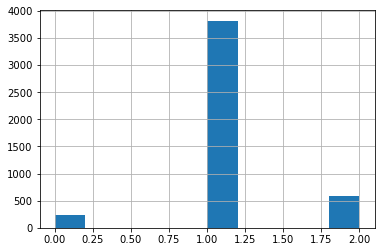

In [60]:
traineddata['Item_Type'].hist()

In [68]:

# Create MinMaxScaler object
scale = MinMaxScaler()

# Scale the 'Item_Outlet_Sales' column
scaledsales = scale.fit_transform(traineddata[['Item_Outlet_Sales']])

# Save the scaled values to the original dataset
traineddata['Item_Outlet_Sales'] = scaledsales



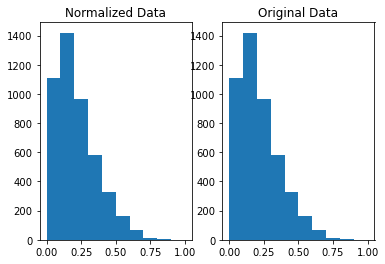

In [69]:

plt.subplot(1, 2, 1)
plt.hist(traineddata['Item_Outlet_Sales'])
plt.title('Normalized Data')

plt.subplot(1, 2, 2)
plt.hist(traineddata['Item_Outlet_Sales'])
plt.title('Original Data')

plt.show()